# Import Libraries

In [687]:
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
import pickle, random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load data


In [688]:
with open('./data/train.pkl','rb') as f:
    data_set = pickle.load(f)
with open('./data/test.pkl','rb') as f:
    test_set = pickle.load(f)

## Shuffle data for randomisation

In [689]:
random.shuffle(data_set)
#print(data_set)
# random.shuffle(test_set)

# Preprocess

#### Train-Data

In [690]:
trainX = data_set[:,0]
trainY = data_set[:,1]

# print(trainX)

trainX = [ [[j] for j in i] for i in np.split(trainX,16) ]

# print(trainX)

trainY = np.split(trainY,16)
# print(trainY)

#### Test-Data

In [691]:
testX = [[x] for x in test_set[:,0]] 
# print(testX)   
testY = test_set[:,1]
# print(testY)

## TASK 

#### 1:  Train a linear classifier on each of the 16 train sets separately

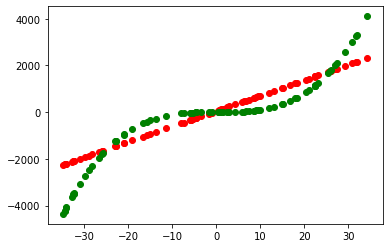

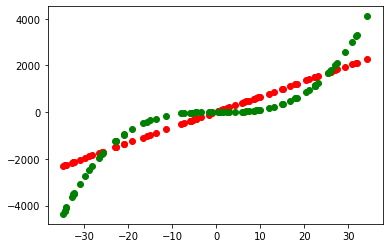

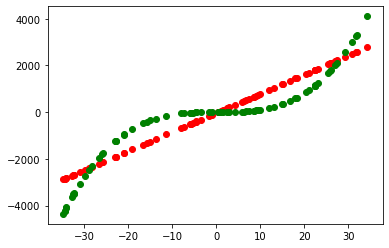

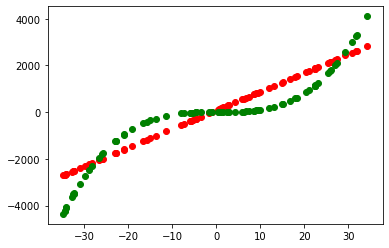

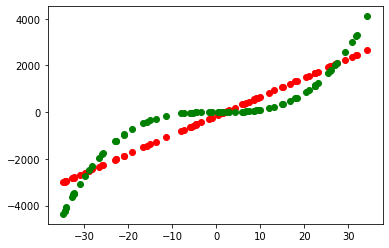

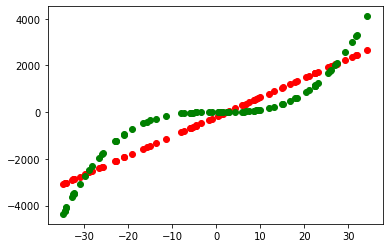

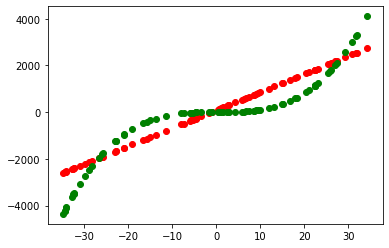

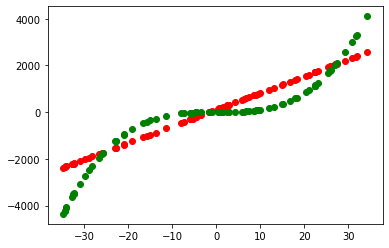

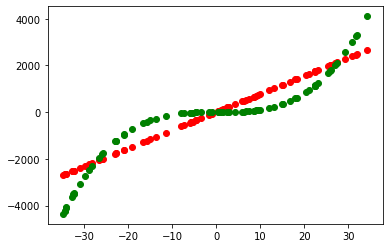

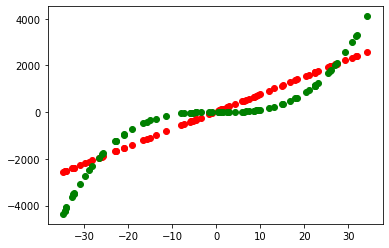

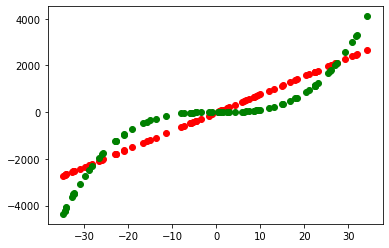

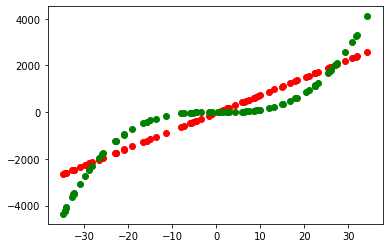

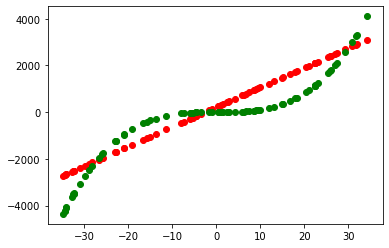

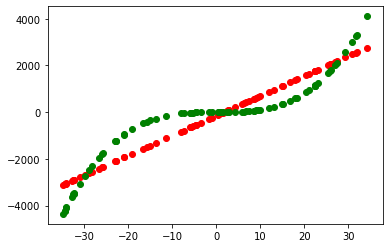

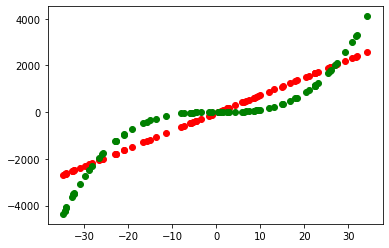

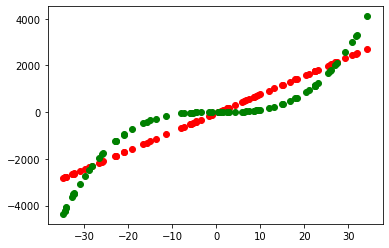

In [692]:
predictedY = []
for i in range (16):
    linearClassifier = LinearRegression().fit(trainX[i], trainY[i])
    prediction = linearClassifier.predict(testX)
    predictedY.append(prediction)
    plt.plot(testX, predictedY[i], 'o', color = 'red')
    plt.plot(testX, testY, 'o', color = 'g')
    plt.show()

# axis = 0 , as to find mean of all the 16 predicted values for any particular x [mean along each column] [used later]
avgY = np.mean(predictedY, axis=0)

#### 2: Calculate Bias and variance

In [693]:
# calculate bias and variance for test data and predicted data
# bias2 = (np.array(testY - avgY))**2
# bias2 = np.mean(bias2)

tmse = []


var = []

for y in predictedY:
    var.append(np.mean((y - avgY)**2))
    tmse.append(np.mean((y - testY)**2))

mse = np.mean(tmse)

variance = np.mean(var)

bias = (np.abs(testY - avgY))
bias2 = np.mean(bias**2)
bias = np.mean(bias)

irr = mse - bias2 - variance
# print(irr)
# print(bias2, var)
print(bias, variance)




583.8805686745263 24019.654279622533


#### Now do the same for polynomials from deg 2 to 15

In [694]:
# initialising the arrays with degree=1 values

whYmean = []
whYmean.append(avgY)
allpred = []
allpred.append(predictedY)

# print(y_pred)
# print("diff")
# print(predictedY)    
# real y values = testY
# trainX, trainY
# y = mx+c, -> fit/bias/variance
# y = ax^2 + bx + c -> fit/bias/variance   [a,b,c]

for deg in range(2, 16):      # for each degree
    # print(deg)
    tempdegY = []
    for i in range(16):
        trans = PolynomialFeatures(deg)
        x = trans.fit_transform(trainX[i])
        x_t = trans.transform(testX)
        linearClassifier = LinearRegression().fit(x, trainY[i])
        tempdegY.append(linearClassifier.predict(x_t))
    allpred.append(tempdegY)
    whYmean.append(np.mean(tempdegY, axis=0))
    
    


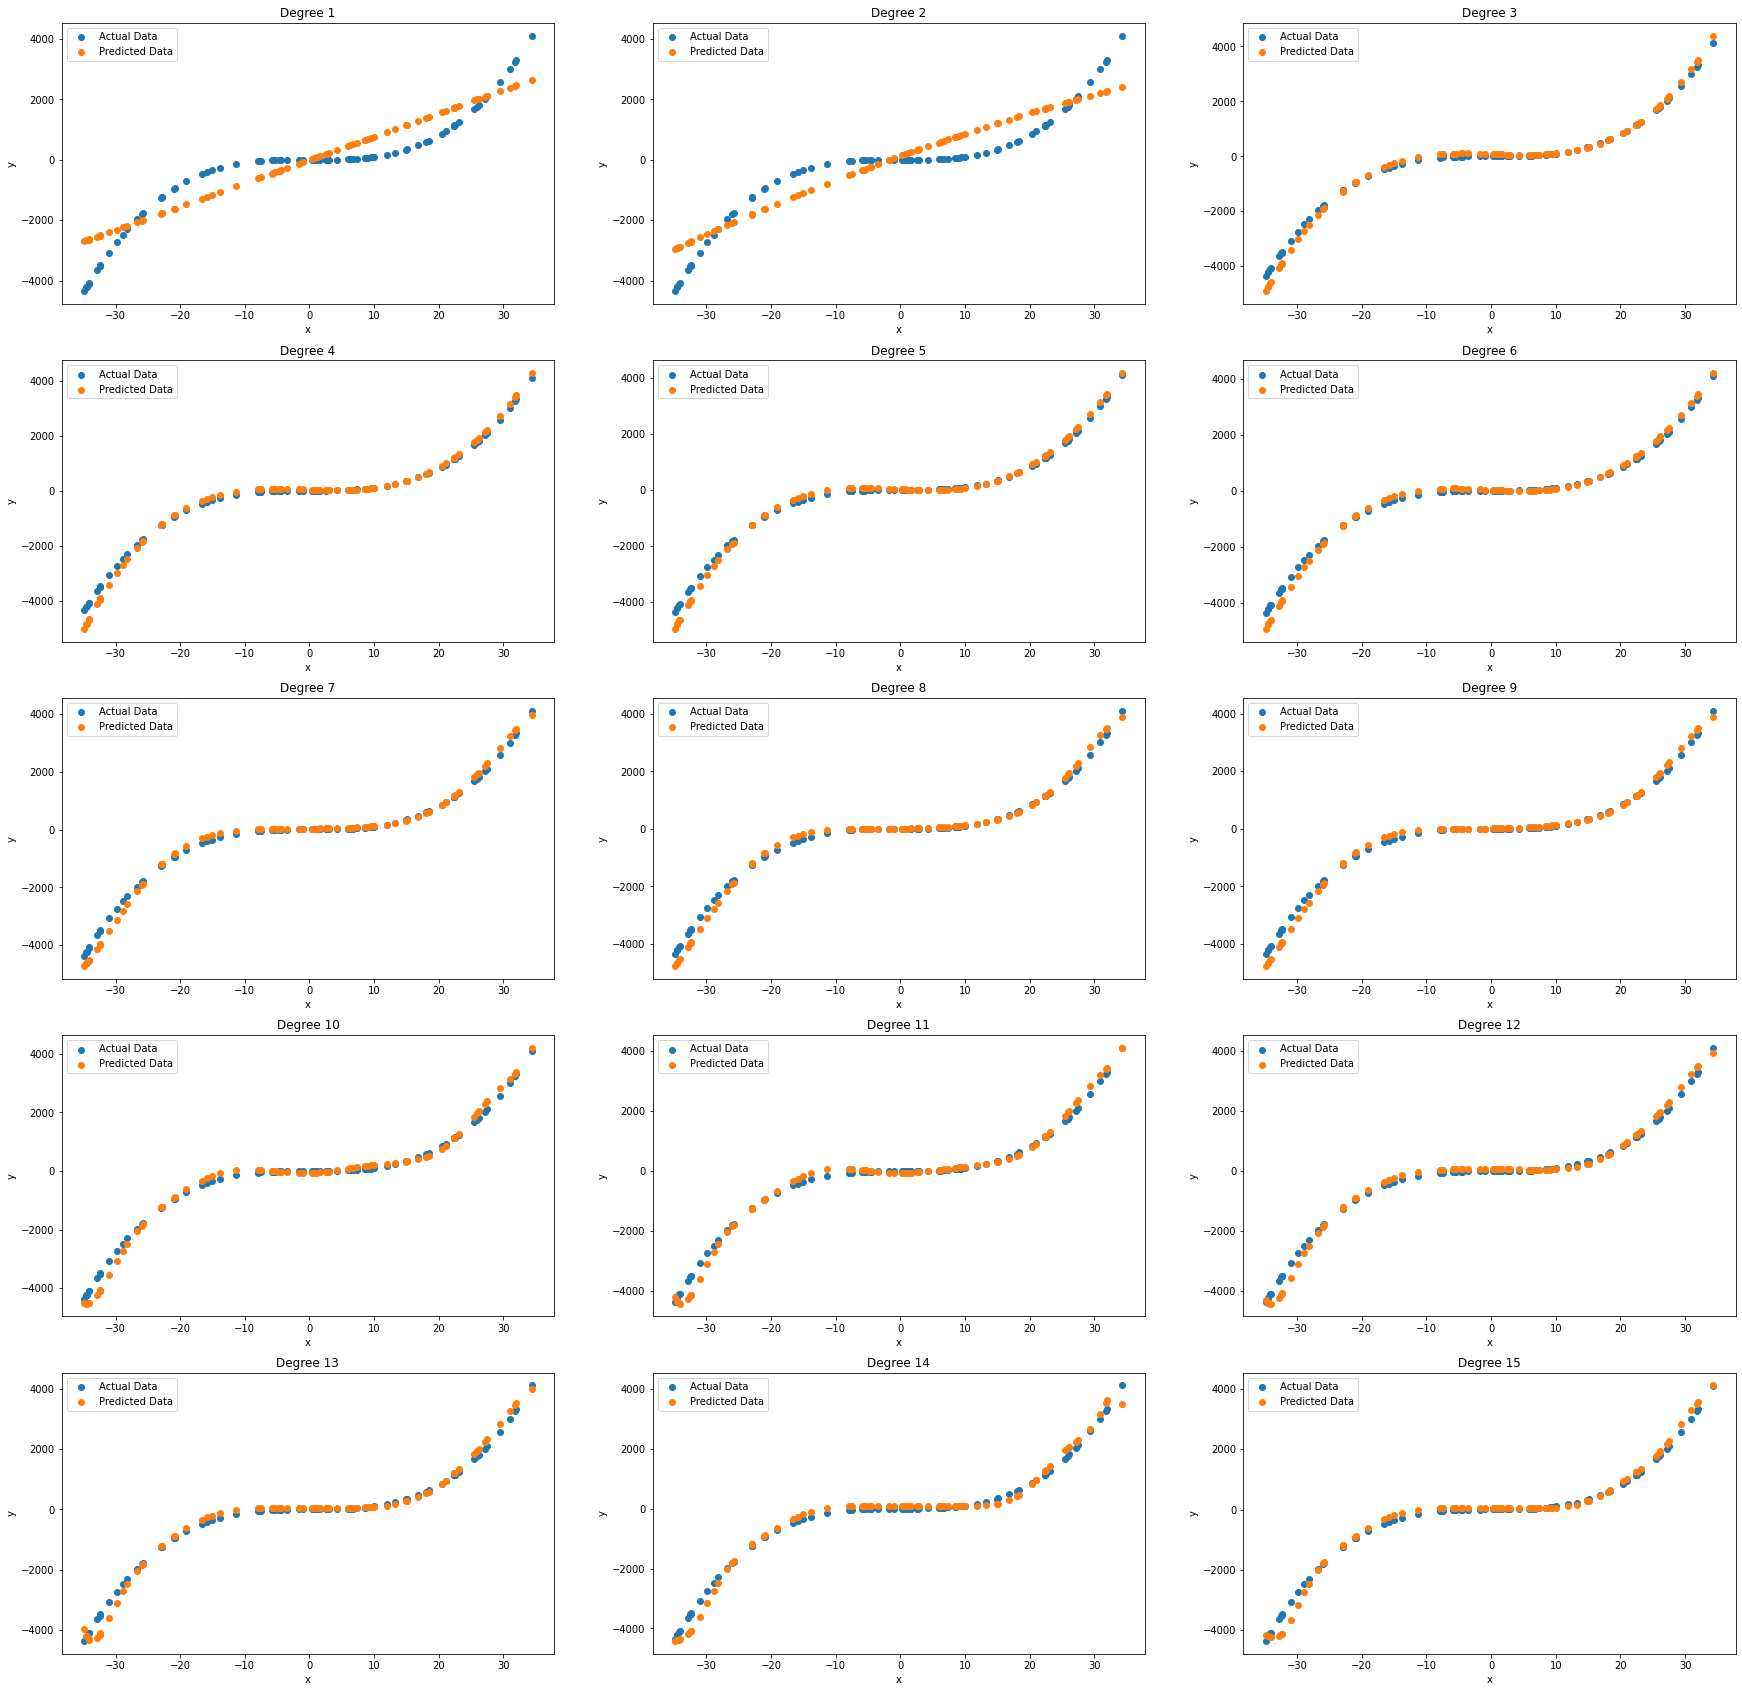

In [695]:
fig, axs = plt.subplots(5,3,figsize=(30, 30))

for degree in range(1,16):    
    axs.flat[degree-1].scatter(testX, testY, label='Actual Data')
    axs.flat[degree-1].scatter(testX, whYmean[degree-1], label='Predicted Data')
    axs.flat[degree-1].set(xlabel='x', ylabel='y')
    axs.flat[degree-1].set_title('Degree ' + str(degree))
    axs.flat[degree-1].legend()



#### Bias, variance tabulation

In [700]:
msePoly = []
msePoly.append(mse)

biasPoly = []
biasPoly.append(bias)

bias2Poly = []
bias2Poly.append(bias2)
variancePoly = []
variancePoly.append(variance)


irrError = []
irrError.append(irr)

for deg in range(2, 16):
    # b = calc_bias2(y_test, y_m[deg-1])
    b = (np.abs(testY - whYmean[deg-1]))
    b2 = np.mean(b**2)
    b = np.mean(b)

    # v = calc_var(y_pred[deg-1], y_m[deg-1])
    ttempmse = []
    tv = []
    for y in allpred[deg-1]:
        tv.append(np.mean(((y - whYmean[deg-1])**2)))
        ttempmse.append(np.mean(((y - testY)**2)))

    tempmse = np.mean(ttempmse)

    v = np.mean(tv) 
    msePoly.append(tempmse)
    biasPoly.append(b)
    bias2Poly.append(b2)
    variancePoly.append(v)

    e = tempmse - b2 - v
    irrError.append(e)
    # print(e)

# print(biasPoly,variancePoly)

# print(irrError)
table = pd.DataFrame({
   
    "bias": biasPoly,
    "variance": variancePoly,
})

table.index = range(1,16)
table.round(4)




,bias,variance
1,583.8806,24019.6543
2,571.2000,34828.5108
3,124.7227,63598.6175
4,124.0248,80320.7770
5,129.6231,117400.4410
6,130.0741,126851.2653
7,126.9183,140576.0638
8,123.7884,154650.6550
9,126.6657,170086.3400
10,132.3232,185776.2254


## TASK 3

to calculate irreducible error e

e = MSE - Bias*2 - Variance


MSE = avg of (testY - allpred)**2

In [697]:

table = pd.DataFrame({
    "bias": biasPoly,
    "variance": variancePoly,
    "mse" : msePoly,
    "bias2" : bias2Poly,
    "irreducible error": irrError
})

table.index = range(1,16)
table



,bias,variance,mse,bias2,irreducible error
1,583.880569,24019.654280,503980.695040,479961.040760,7.275958e-12
2,571.199998,34828.510805,482047.815709,447219.304905,6.548362e-11
3,124.722729,63598.617455,100291.115558,36692.498103,0.000000e+00
4,124.024781,80320.776978,123631.471594,43310.694616,-1.455192e-11
5,129.623118,117400.441031,156670.276702,39269.835671,1.455192e-11
6,130.074123,126851.265318,166244.427700,39393.162382,-1.455192e-11
7,126.918312,140576.063826,176786.853973,36210.790146,0.000000e+00
8,123.788394,154650.655021,190523.015178,35872.360157,0.000000e+00
9,126.665679,170086.339952,207091.209474,37004.869522,-2.910383e-11
10,132.323180,185776.225396,224469.479558,38693.254162,-5.820766e-11


## Task 4

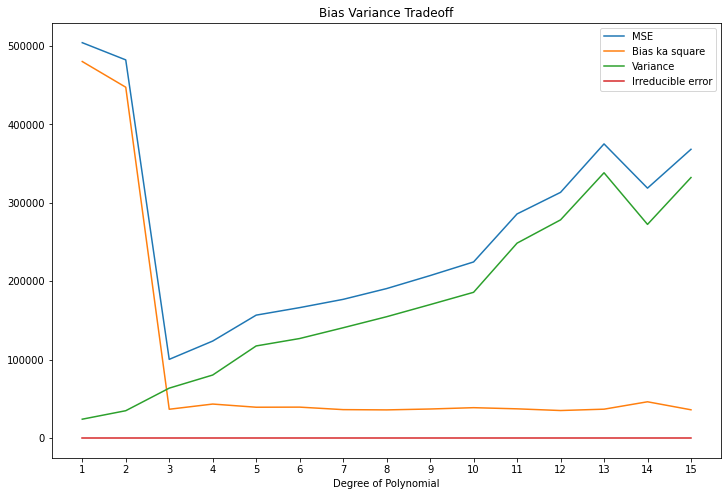

In [703]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,16),msePoly, label='MSE')
plt.plot(range(1,16),bias2Poly,label='Bias ka square')
plt.plot(range(1,16),variancePoly, label='Variance')
plt.plot(range(1,16),irrError, label='Irreducible error')
plt.xlabel("Degree of Polynomial")
plt.title("Bias Variance Tradeoff")
plt.xticks(range(1,16))
plt.legend()